<a href="https://colab.research.google.com/github/inigoER/Neural-networks/blob/main/Sentinel-2A/Modelos_USA_Nitr%C3%B3geno_Sentinel_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación

In [1]:
!pip install openpyxl --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
def remove_out(DataIn, colName):
  q_l=DataIn[colName].quantile(0.25)
  q_h=DataIn[colName].quantile(0.75)
  IQR=q_h-q_l
  OutRange=IQR*1.5
  qoutl=(q_l-OutRange)
  qouth=(q_h+OutRange)
  DataOut=DataIn[(DataIn[colName] < qouth) & (DataIn[colName] > qoutl)]
  return DataOut
def getQuartiles(df,col):
  quartArray=(df[col].quantile(0),df[col].quantile(0.25),df[col].quantile(0.5),df[col].quantile(0.75),df[col].quantile(1))
  return quartArray

In [4]:
data=pd.read_excel("Base de Nitrogeno con bandas USA Sentinel 2A.xlsx")
data.isnull().sum(axis=0)

Unnamed: 0           0
Lat                  0
Lon                  0
Fecha                0
Nitrogeno Ammonia    0
Fecha_ref            0
Fecha_plus           0
Fecha_less           0
Actual_Date          0
B1                   0
B2                   0
B3                   0
B4                   0
B5                   0
B6                   0
B7                   0
B8                   0
B8A                  0
B9                   0
B11                  0
B12                  0
dtype: int64

In [5]:
dataAnalisis=data.drop(labels=['Unnamed: 0','Lat','Lon','Fecha','Fecha_ref','Fecha_plus','Fecha_less','Actual_Date'], axis=1)
dataAnalisis.isnull().sum(axis=0)

Nitrogeno Ammonia    0
B1                   0
B2                   0
B3                   0
B4                   0
B5                   0
B6                   0
B7                   0
B8                   0
B8A                  0
B9                   0
B11                  0
B12                  0
dtype: int64

In [6]:
dataAnalisis=dataAnalisis.reset_index()
dataAnalisis=dataAnalisis.drop('index',axis=1)
for col in dataAnalisis:
  if col!='Nitrogeno Ammonia':
    max=dataAnalisis[col].max()
    min=dataAnalisis[col].min()
  #Asegurarse de que la feature tenga valores distintos, o sea una desviación mayor a 0.
    if max!=min:
      dataAnalisis[col]=dataAnalisis[col].apply(
          lambda value: (value)/(20000)
          )
  #Si la feature tiene una desviación de 0 (todos sus valores son iguales), desecharla
    else:
      dataAnalisis.drop(col,axis=1)
dataAnalisis

,Nitrogeno Ammonia,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,0.05,0.00925,0.01835,0.03750,0.03520,0.03480,0.01125,0.01060,0.00845,0.00380,0.00005,0.00005,0.00005
1,0.05,0.01340,0.01410,0.02585,0.01080,0.01075,0.00335,0.00310,0.00365,0.00220,0.00005,0.00120,0.00175
2,0.05,0.01930,0.02790,0.03730,0.02600,0.02325,0.00745,0.00780,0.00730,0.00440,0.00080,0.00140,0.00170
3,0.05,0.02415,0.03330,0.04875,0.04040,0.04085,0.01590,0.01430,0.01285,0.00730,0.00040,0.00065,0.00065
4,0.05,0.01690,0.02595,0.03695,0.02365,0.02005,0.00335,0.00435,0.00265,0.00115,0.00005,0.00125,0.00170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0.05,0.02265,0.02650,0.04070,0.03705,0.04130,0.02020,0.02110,0.01780,0.01805,0.01285,0.01410,0.01305
405,0.10,0.04880,0.06660,0.07860,0.07250,0.07060,0.05835,0.05560,0.05710,0.05285,0.06125,0.05820,0.05445
406,0.05,0.01510,0.01970,0.02990,0.01495,0.01100,0.00390,0.00410,0.00390,0.00270,0.00010,0.00165,0.00160
407,0.05,0.01550,0.02145,0.02780,0.01325,0.00995,0.00450,0.00460,0.00415,0.00265,0.00100,0.00165,0.00110


#EDA

##Histograma

In [9]:
fig = px.histogram(dataAnalisis, x="Nitrogeno Ammonia")
fig.show()

## Correlaciones

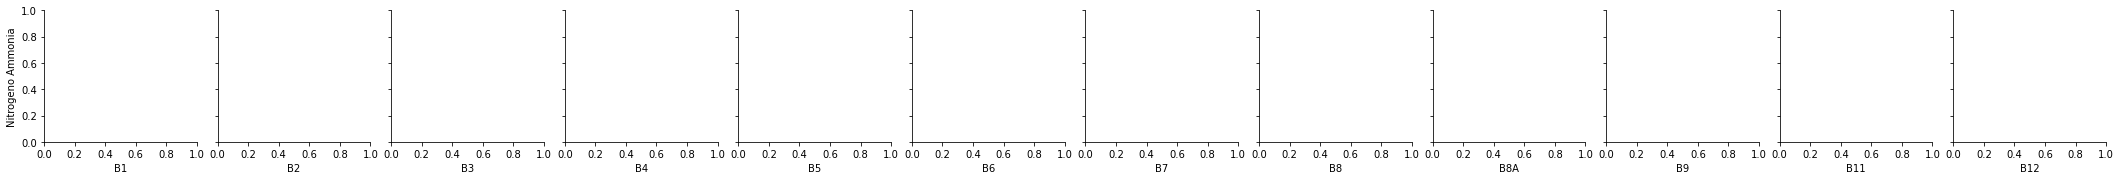

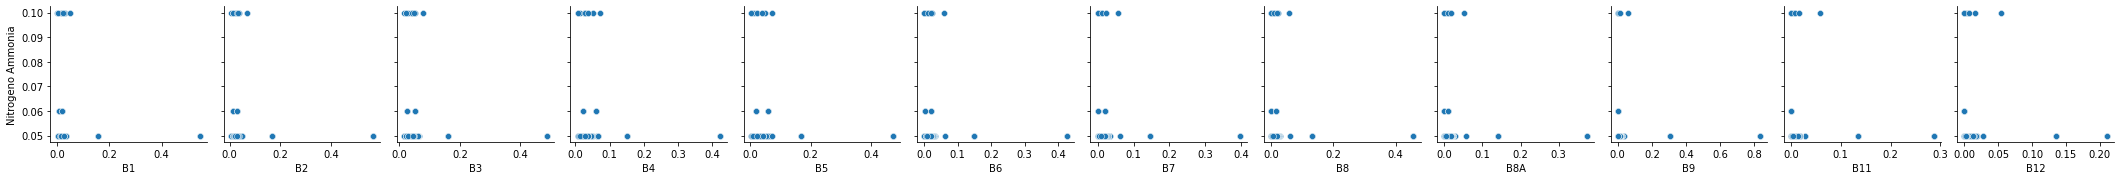

In [10]:
import seaborn as sns
sns.pairplot(remove_out(dataAnalisis, 'Nitrogeno Ammonia'),x_vars=["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A", "B9", "B11", "B12"],
    y_vars=["Nitrogeno Ammonia"])
sns.pairplot(dataAnalisis,x_vars=["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A", "B9", "B11", "B12"],
    y_vars=["Nitrogeno Ammonia"])

## Líneas

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.150

In [12]:
qNitrogeno=getQuartiles(dataAnalisis, 'Nitrogeno Ammonia')

In [13]:
dataAnalisis1=dataAnalisis.loc[(dataAnalisis['Nitrogeno Ammonia']>=qNitrogeno[0]) & (dataAnalisis['Nitrogeno Ammonia']<=qNitrogeno[1])]
dataAnalisis2=dataAnalisis.loc[(dataAnalisis['Nitrogeno Ammonia']>=qNitrogeno[1]) & (dataAnalisis['Nitrogeno Ammonia']<=qNitrogeno[2])]
dataAnalisis3=dataAnalisis.loc[(dataAnalisis['Nitrogeno Ammonia']>=qNitrogeno[2]) & (dataAnalisis['Nitrogeno Ammonia']<=qNitrogeno[3])]
dataAnalisis4=dataAnalisis.loc[(dataAnalisis['Nitrogeno Ammonia']>=qNitrogeno[3]) & (dataAnalisis['Nitrogeno Ammonia']<=qNitrogeno[4])]

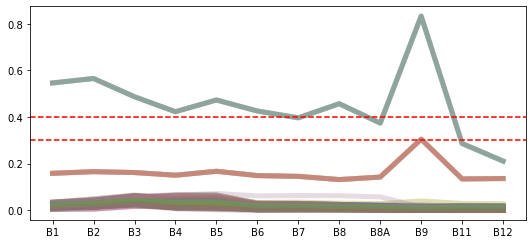

In [14]:
for index, row in dataAnalisis1.drop('Nitrogeno Ammonia',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

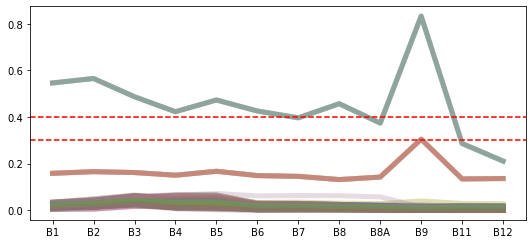

In [15]:
for index, row in dataAnalisis2.drop('Nitrogeno Ammonia',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

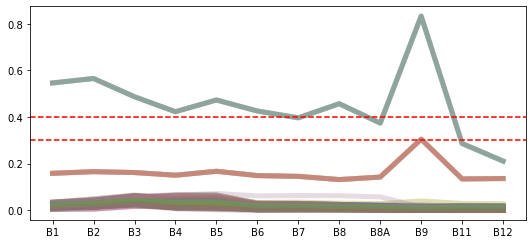

In [16]:
for index, row in dataAnalisis3.drop('Nitrogeno Ammonia',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

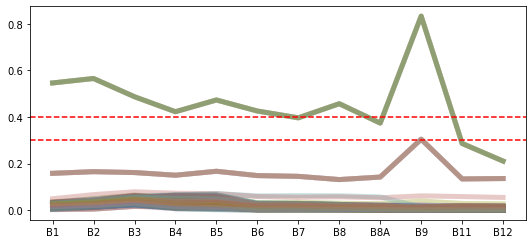

In [17]:
for index, row in dataAnalisis4.drop('Nitrogeno Ammonia',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

# Modelos

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
Y = dataAnalisis['Nitrogeno Ammonia']
X = dataAnalisis.drop(labels=['Nitrogeno Ammonia'], axis=1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Random forrest

In [41]:
rfn = RandomForestRegressor(max_depth=8)
rfn.fit(X_train, Y_train)

RandomForestRegressor(max_depth=8)

In [42]:
Yr_test=rfn.predict(X_test)
Yr_train=rfn.predict(X_train)

In [43]:
mean_squared_error(Yr_test,Y_test)

6.356518343076017e-05

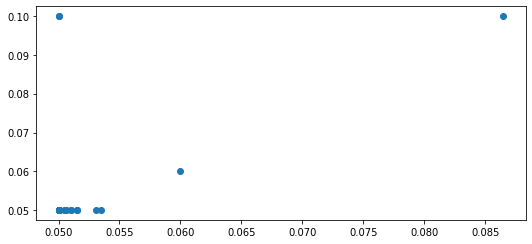

In [44]:
plt.scatter(Yr_test, Y_test)
plt.show()

In [45]:
mean_squared_error(Yr_train,Y_train)

4.714357924533139e-06

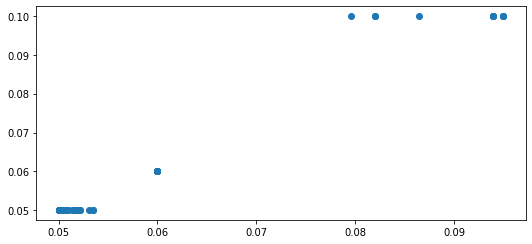

In [46]:
plt.scatter(Yr_train, Y_train)
plt.show()

## Regresión lineal

In [47]:
lr=linear_model.LinearRegression()
lr=lr.fit(X_train, Y_train)
print(lr.intercept_)
print(lr.coef_)

0.04649771442850961
[-0.32778473 -0.35390888  0.76383279  0.75768681 -1.42979292  1.10046174
 -0.51478888  0.80358731 -0.81254175 -0.12991284  0.36054361  0.20916248]


In [48]:
Yl_test=lr.predict(X_test)
Yl_train=lr.predict(X_train)

In [49]:
mean_squared_error(Yl_test,Y_test)

4.498574144812816e-05

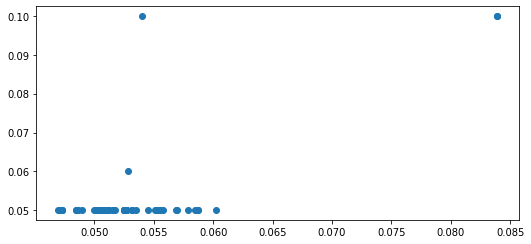

In [50]:
plt.scatter(Yl_test, Y_test)
plt.show()

In [51]:
mean_squared_error(Yl_train,Y_train)

7.498955866318294e-05

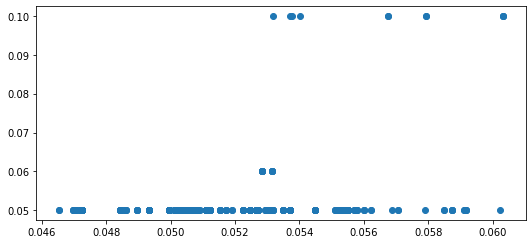

In [52]:
plt.scatter(Yl_train, Y_train)
plt.show()

## Red neuronal

In [53]:
nnw = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(64,16,8), max_iter=100000)
nnw.fit(X_train, Y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(64, 16, 8), max_iter=100000)

In [54]:
Yn_test=nnw.predict(X_test)
Yn_train=nnw.predict(X_train)

In [55]:
mean_squared_error(Yn_test,Y_test)

0.00020547738569661681

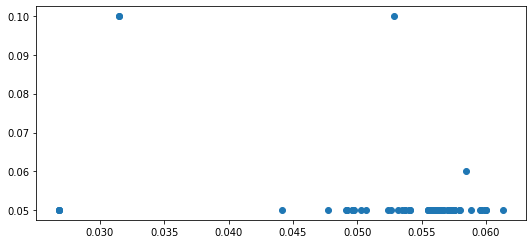

In [56]:
plt.scatter(Yn_test, Y_test)
plt.show()

In [57]:
mean_squared_error(Yn_train,Y_train)

0.00012495614402112794

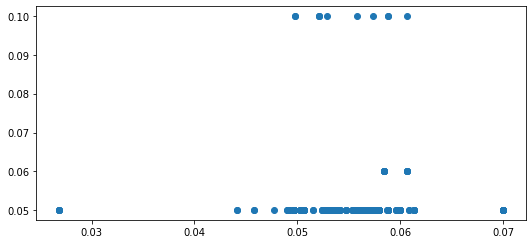

In [58]:
plt.scatter(Yn_train, Y_train)
plt.show()

##Métricas

In [59]:
Dataset=['Nitrogeno Ammonia','Nitrogeno Ammonia','Nitrogeno Ammonia']
Model=['RFR','SLR','MLPR']
MSETest=[mean_squared_error(Yr_test,Y_test), mean_squared_error(Yl_test,Y_test),mean_squared_error(Yn_test,Y_test)]
MSETrain=[mean_squared_error(Yr_train,Y_train), mean_squared_error(Yl_train,Y_train), mean_squared_error(Yn_train,Y_train)]
minarr=[dataAnalisis.min()[0],dataAnalisis.min()[0],dataAnalisis.min()[0]]
maxarr=[dataAnalisis.max()[0],dataAnalisis.max()[0],dataAnalisis.max()[0]]
Datasetpd = pd.DataFrame(Dataset)
Datasetpd.columns = ['Dataset']
Modelpd = pd.DataFrame(Model)
Modelpd.columns=['Modelo']
MSETestpd = pd.DataFrame(MSETest)
MSETestpd.columns=['MSETest']
MSETrainpd = pd.DataFrame(MSETrain)
MSETrainpd.columns = ['MSETrain']
minpd = pd.DataFrame(minarr)
minpd.columns = ['Min']
maxpd = pd.DataFrame(maxarr)
maxpd.columns = ['Max']

Track = Datasetpd.join(Modelpd)
Track = Track.join(MSETestpd)
Track = Track.join(MSETrainpd)
Track = Track.join(minpd)
Track = Track.join(maxpd)

Track

,Dataset,Modelo,MSETest,MSETrain,Min,Max
0,Nitrogeno Ammonia,RFR,0.000064,0.000005,0.05,0.1
1,Nitrogeno Ammonia,SLR,0.000045,0.000075,0.05,0.1
2,Nitrogeno Ammonia,MLPR,0.000205,0.000125,0.05,0.1


In [60]:
Dataset=['Nitrogeno Ammonia','Nitrogeno Ammonia','Nitrogeno Ammonia']
Model=['RFR','SLR','MLPR']
RMSETest=[np.sqrt(mean_squared_error(Yr_test,Y_test)), np.sqrt(mean_squared_error(Yl_test,Y_test)),np.sqrt(mean_squared_error(Yn_test,Y_test))]
RMSETrain=[np.sqrt(mean_squared_error(Yr_train,Y_train)), np.sqrt(mean_squared_error(Yl_train,Y_train)), np.sqrt(mean_squared_error(Yn_train,Y_train))]
minarr=[dataAnalisis.min()[0],dataAnalisis.min()[0],dataAnalisis.min()[0]]
maxarr=[dataAnalisis.max()[0],dataAnalisis.max()[0],dataAnalisis.max()[0]]
PercentageTest=[np.sqrt(mean_squared_error(Yr_test,Y_test))/(remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].max()-remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].min()),np.sqrt(mean_squared_error(Yl_test,Y_test))/(remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].max()-remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].min()), np.sqrt(mean_squared_error(Yn_test,Y_test))/(remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].max()-remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].min())]
PercentageTrain=[np.sqrt(mean_squared_error(Yr_train,Y_train))/(remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].max()-remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].min()),np.sqrt(mean_squared_error(Yl_train,Y_train))/(remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].max()-remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].min()), np.sqrt(mean_squared_error(Yn_train,Y_train))/(remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].max()-remove_out(dataAnalisis,'Nitrogeno Ammonia')['Nitrogeno Ammonia'].min())]
Datasetpd = pd.DataFrame(Dataset)
Datasetpd.columns = ['Dataset']
Modelpd = pd.DataFrame(Model)
Modelpd.columns=['Modelo']
RMSETestpd = pd.DataFrame(RMSETest)
RMSETestpd.columns=['RMSETest']
RMSETrainpd = pd.DataFrame(RMSETrain)
RMSETrainpd.columns = ['RMSETrain']
minpd = pd.DataFrame(minarr)
minpd.columns = ['Min']
maxpd = pd.DataFrame(maxarr)
maxpd.columns = ['Max']
PercTestpd=pd.DataFrame(PercentageTest)
PercTestpd.columns = ['Porcentaje de error test']
PercTrainpd=pd.DataFrame(PercentageTrain)
PercTrainpd.columns = ['Porcentaje de error train']

Track = Datasetpd.join(Modelpd)
Track = Track.join(RMSETestpd)
Track = Track.join(RMSETrainpd)
Track = Track.join(minpd)
Track = Track.join(maxpd)
Track = Track.join(PercTestpd)
Track = Track.join(PercTrainpd)

Track

,Dataset,Modelo,RMSETest,RMSETrain,Min,Max,Porcentaje de error test,Porcentaje de error train
0,Nitrogeno Ammonia,RFR,0.007973,0.002171,0.05,0.1,NaN,NaN
1,Nitrogeno Ammonia,SLR,0.006707,0.008660,0.05,0.1,NaN,NaN
2,Nitrogeno Ammonia,MLPR,0.014334,0.011178,0.05,0.1,NaN,NaN
